In [1]:
## Classify different images of cloths and using tensorflow fashion mnist dataset 

import pandas as pd 
import numpy as np
import keras 
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images[0].shape, train_labels.shape

((28, 28), (60000,))

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
y_train = tf.one_hot(train_labels, depth=10)
y_test = tf.one_hot(test_labels, depth=10)

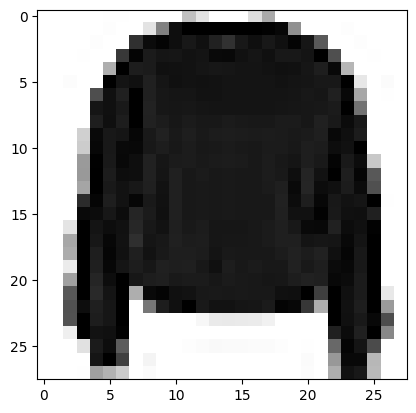

In [6]:
# Plot a single sample 

plt.imshow(train_images[7], cmap=plt.cm.binary)

In [7]:
# Create a small list so that we can index onto our training labels so they are human readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boat"]

In [8]:
len(class_names)

10

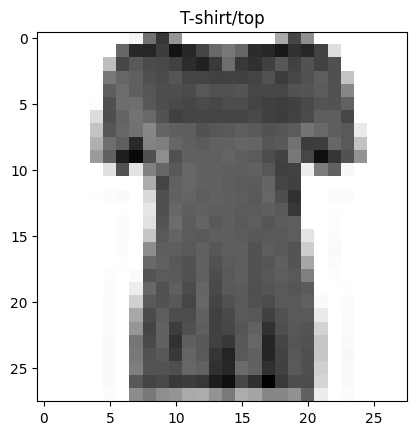

In [9]:
#plot and example image and label

def plot_image_with_class_name(X_train=train_images, y_train=train_labels, class_names=class_names, index=0):
    plt.imshow(X_train[index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[index]]) 

plot_image_with_class_name(index=10)

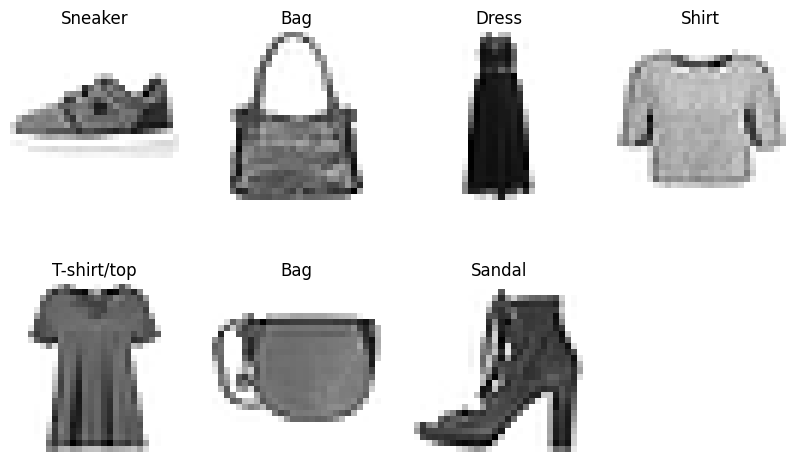

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def plot_n_number_of_images(images=train_images,
                            labels=train_labels,
                            label_names=class_names,
                            num_sample=15,
                            num_col=5):
    plt.figure(figsize=(10, 6))
    for i in range(num_sample):
        ax = plt.subplot(int(np.ceil(num_sample / num_col)), num_col, i+1) 
        rand_index = random.choice(range(len(images))) 
        plt.imshow(images[rand_index], cmap=plt.cm.binary)
        plt.title(label_names[train_labels[rand_index]])
        plt.axis(False)

plot_n_number_of_images(num_sample=7, num_col=4)

In [11]:
keras.utils.set_random_seed(42)

model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_1.compile(
    loss=keras.losses.CategoricalCrossentropy(),   # y_train must be one-hot if not use SparseCategoricalCrossentropy()
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_1.summary()
model_1.fit(train_images, y_train, epochs=100, verbose=1, batch_size=4096, validation_data=(test_images, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.2145 - loss: 71.9347 - val_accuracy: 0.4478 - val_loss: 6.1324
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760 - loss: 4.4414 - val_accuracy: 0.4830 - val_loss: 2.1991
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4872 - loss: 2.0214 - val_accuracy: 0.5019 - val_loss: 1.7299
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5182 - loss: 1.6417 - val_accuracy: 0.5443 - val_loss: 1.5371
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5629 - loss: 1.4813 - val_accuracy: 0.5771 - val_loss: 1.4366
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5894 - loss: 1.3780 - val_accuracy: 0.5915 - val_loss: 1.3603
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6017 - loss: 1.3063 - val_accuracy: 0.6027 - val_loss: 1.3025
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: 1.2459 - val_accuracy: 0.6165 -

In [12]:
keras.utils.set_random_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
], name="Model_2")

model_2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),  
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.summary()
history_2 = model_2.fit(train_images, 
            train_labels, 
            epochs=100, 
            verbose=0, 
            batch_size=4096, 
            validation_data=(test_images, test_labels)
           )


Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
y_preds = model_2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


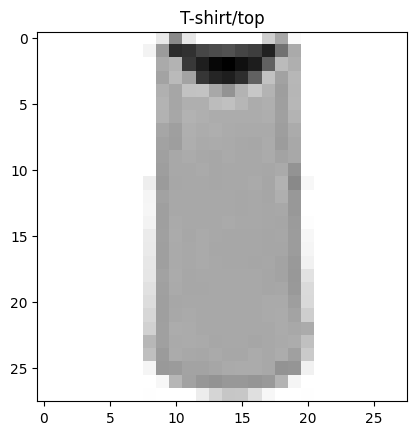

In [14]:
plot_image_with_class_name(index=np.argmax(y_preds[1]))

In [15]:
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,932 (495.83 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,622 (330.56 KB)

In [16]:
## Neural networks data to be scaled or normalized 

train_images.min(), train_images.max()

(0, 255)

In [17]:
# We can normalize testing and training data by dividing max value 

train_images_norm = train_images / train_images.max() 
test_images_norm = test_images / train_images.max() 

In [18]:
train_images_norm.min(), train_images_norm.max()

(0.0, 1.0)

In [19]:
# Model-3 with normalized data 
keras.utils.set_random_seed(42)

input_shape = train_images[0].shape
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')
], name="Model_3")

model_3.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [21]:
history_3 = model_3.fit(
    train_images_norm, 
    y_train,
    epochs=150, 
    validation_data=(test_images_norm, y_test), 
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss', 
            patience=5, 
            restore_best_weights=True, 
        ), 
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            patience=5, 
            restore_best_weights=True
        )
    ], 
    verbose=1,
    batch_size=4096
)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.2706 - loss: 2.1106 - val_accuracy: 0.6089 - val_loss: 1.3852 - learning_rate: 0.0010
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6524 - loss: 1.2093 - val_accuracy: 0.7024 - val_loss: 0.8540 - learning_rate: 0.0010
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7263 - loss: 0.7891 - val_accuracy: 0.7475 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7699 - loss: 0.6560 - val_accuracy: 0.7795 - val_loss: 0.6249 - learning_rate: 0.0010
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7966 - loss: 0.5889 - val_accuracy: 0.7950 - val_loss: 0.5802 - learning_rate: 0.0010
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8123 - loss: 0.5464 - val_accuracy: 0.8087 - val_loss: 0.5478 - learning_rate: 0.0010
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8219 - loss: 0.5162 - 

In [22]:
model_2.evaluate(test_images, test_labels), model_3.evaluate(test_images_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7974 - loss: 0.6244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8748 - loss: 0.3546


([0.6137494444847107, 0.7940000295639038],
 [0.35829392075538635, 0.8726999759674072])

<Axes: >

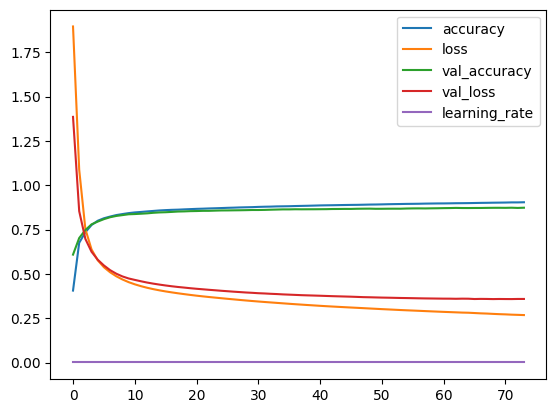

In [23]:
pd.DataFrame(history_3.history).plot()

<Axes: >

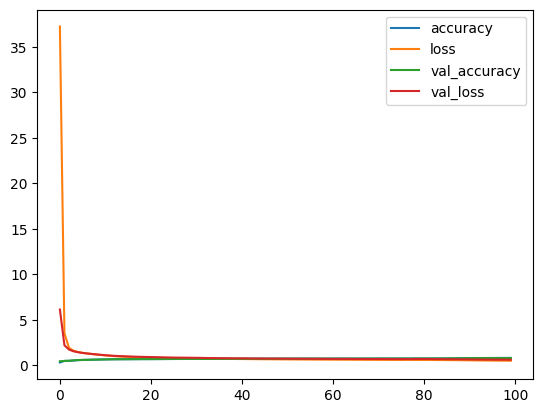

In [24]:
pd.DataFrame(history_2.history).plot()

## Finding ideal learning rate 

In [25]:
keras.utils.set_random_seed(42) 

model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
], name="Model_4")

model_4.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(), 
    metrics=['accuracy']
)

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

find_lr_history = model_4.fit(
    train_images_norm, 
    y_train, 
    validation_data=(test_images_norm, y_test), 
    epochs=100, 
    batch_size=4096, 
    verbose=0, 
    callbacks=[lr_scheduler]
)

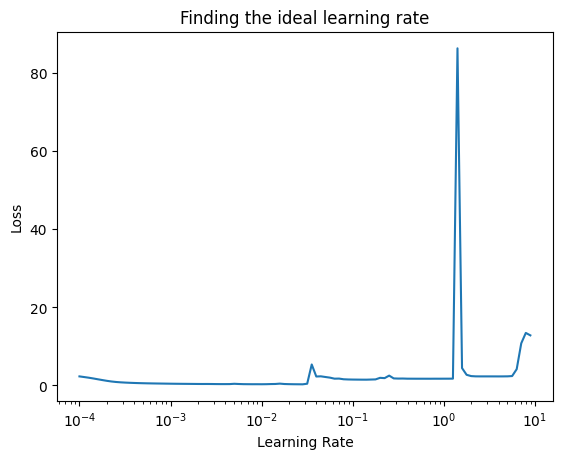

In [26]:
## Plot the learning rate decay curve 

lrs = 1e-4 * (10**(tf.range(100)/20)) 
plt.semilogx(lrs, find_lr_history.history['loss']) 
plt.xlabel("Learning Rate")
plt.ylabel("Loss") 
plt.title("Finding the ideal learning rate");

In [27]:
keras.utils.set_random_seed(42) 

model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(50, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
], "Model_5")

model_5.compile(
    loss=keras.losses.CategoricalCrossentropy(), 
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    metrics=['accuracy']
)


history_5 = model_5.fit(
    train_images_norm, 
    y_train, 
    validation_data=(test_images_norm, y_test), 
    epochs=100, 
    batch_size=4096, 
    verbose=0
)

In [28]:
model_5.evaluate(test_images_norm, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8748 - loss: 0.3590


[0.35946351289749146, 0.8727999925613403]

In [29]:
y_preds_5 = model_5.predict(test_images_norm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


In [30]:
# y_preds_actual = [np.argmax(i) for i in y_preds_5]
y_preds_actual = y_preds_5.argmax(axis=1)

In [31]:
y_preds_actual[:3]

array([9, 2, 1])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
confusion_matrix = confusion_matrix(y_true=test_labels, y_pred=y_preds_actual)
confusion_matrix

array([[766,   2,  20,  46,   4,   3, 151,   0,   8,   0],
       [  1, 961,   3,  27,   3,   0,   5,   0,   0,   0],
       [  8,   1, 814,  18,  79,   0,  80,   0,   0,   0],
       [ 17,   5,  18, 912,  21,   0,  24,   0,   3,   0],
       [  0,   0, 138,  47, 745,   1,  68,   0,   1,   0],
       [  0,   0,   0,   0,   0, 959,   0,  28,   2,  11],
       [ 89,   3,  93,  42,  53,   0, 715,   0,   5,   0],
       [  0,   0,   0,   0,   0,  28,   0, 953,   0,  19],
       [  5,   1,   7,   4,   5,   4,  13,   5, 956,   0],
       [  1,   0,   0,   0,   0,  13,   1,  38,   0, 947]])

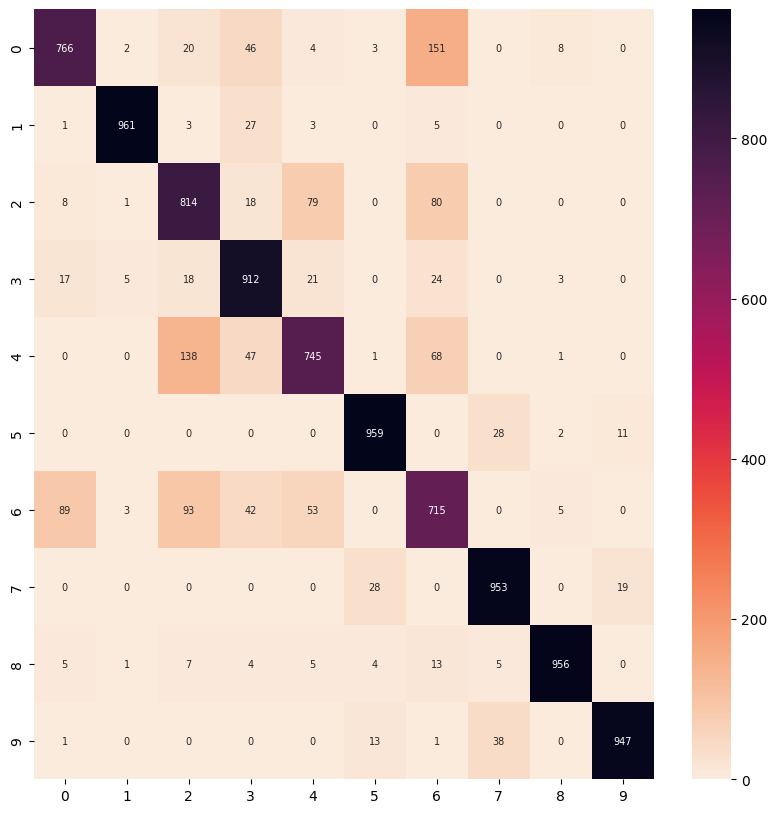

In [35]:
import seaborn as sns 

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='rocket_r',
            annot_kws={"size": 7},
            fmt="d");

In [40]:
from sklearn.metrics import confusion_matrix 

confusion_matrix = confusion_matrix(y_true=test_labels, 
                                   y_pred=y_preds_actual)

confusion_matrix

array([[766,   2,  20,  46,   4,   3, 151,   0,   8,   0],
       [  1, 961,   3,  27,   3,   0,   5,   0,   0,   0],
       [  8,   1, 814,  18,  79,   0,  80,   0,   0,   0],
       [ 17,   5,  18, 912,  21,   0,  24,   0,   3,   0],
       [  0,   0, 138,  47, 745,   1,  68,   0,   1,   0],
       [  0,   0,   0,   0,   0, 959,   0,  28,   2,  11],
       [ 89,   3,  93,  42,  53,   0, 715,   0,   5,   0],
       [  0,   0,   0,   0,   0,  28,   0, 953,   0,  19],
       [  5,   1,   7,   4,   5,   4,  13,   5, 956,   0],
       [  1,   0,   0,   0,   0,  13,   1,  38,   0, 947]])

In [41]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

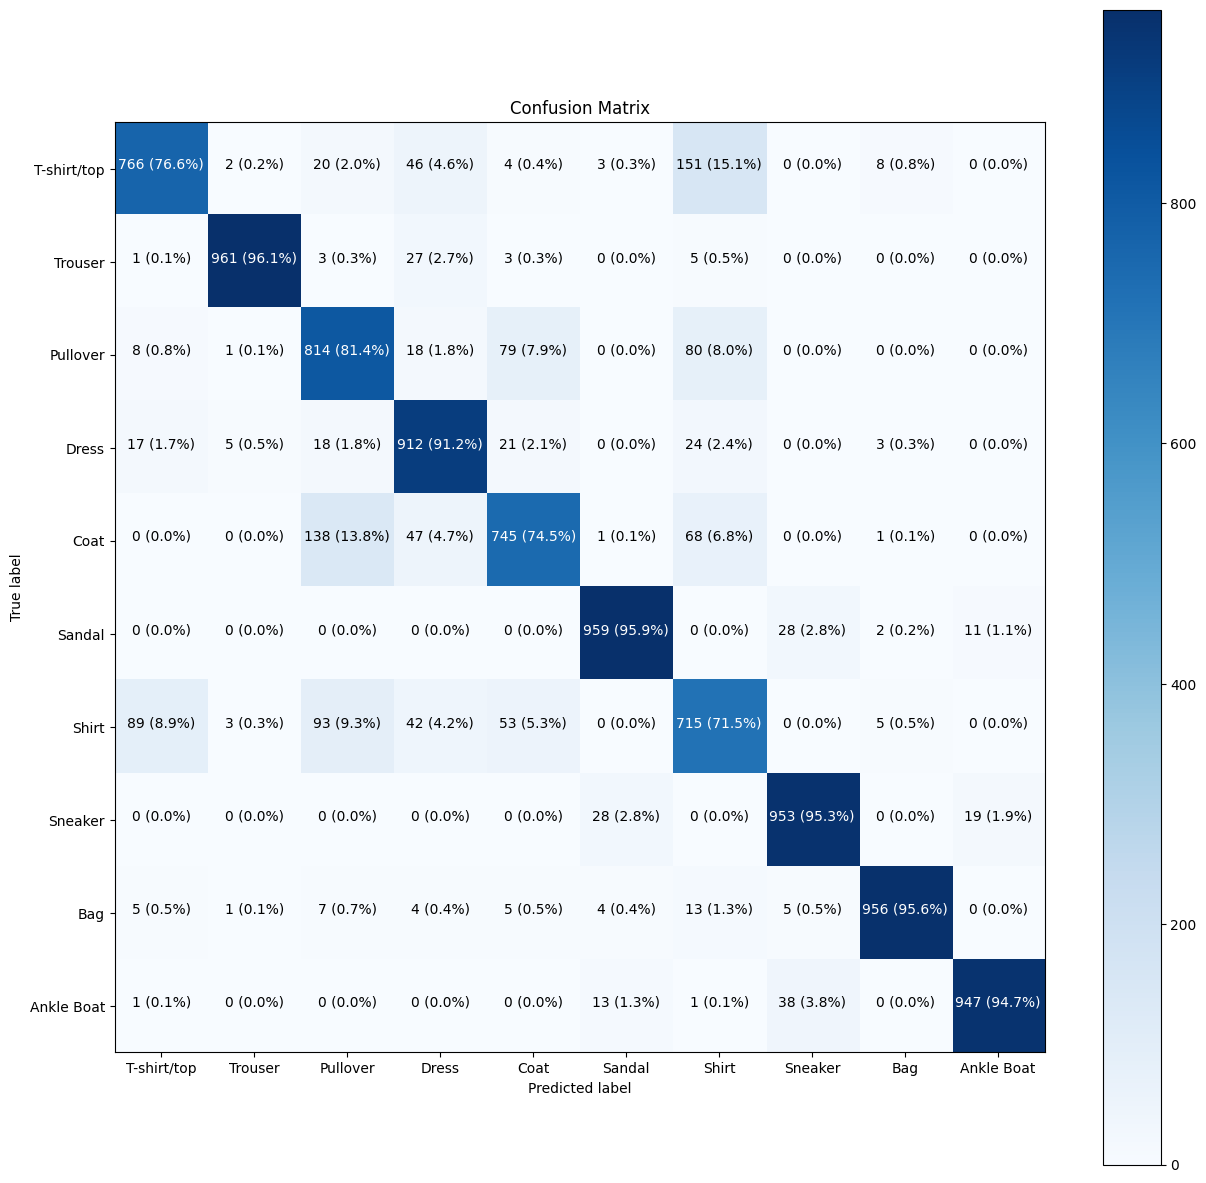

In [44]:
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds_actual,
    classes=class_names,
    figsize=(15, 15),
    text_size=10,
)

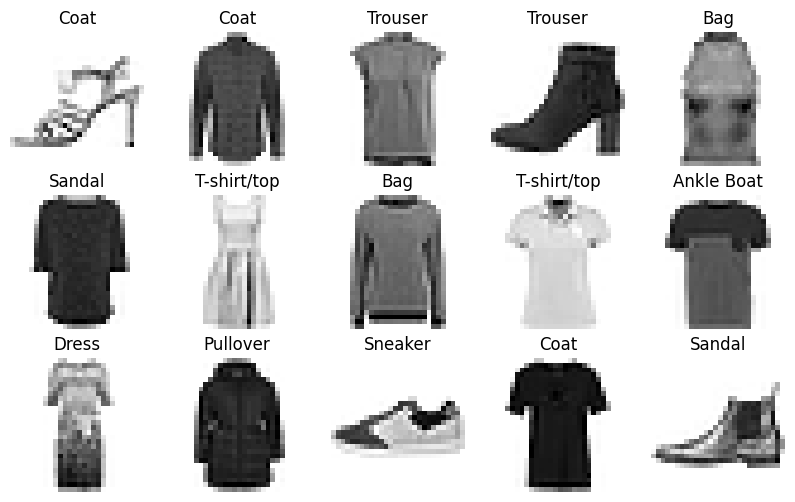

In [49]:
plot_n_number_of_images(images=test_images, 
                       labels=y_preds_actual, 
                       label_names=class_names)

In [85]:
import random 

def plot_random_image(model, images, true_labels, classes): 
    i = random.randint(0, len(images)) 
    target_image = images[i] 
    true_label = classes[true_labels[i]]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) 
    pred_label = classes[pred_probs.argmax()] 

    plt.imshow(target_image, cmap=plt.cm.binary) 

    if pred_label == true_label: 
        color = "green"
    else: 
        color = "red"
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs), 
                                                    true_label), 
              color=color)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


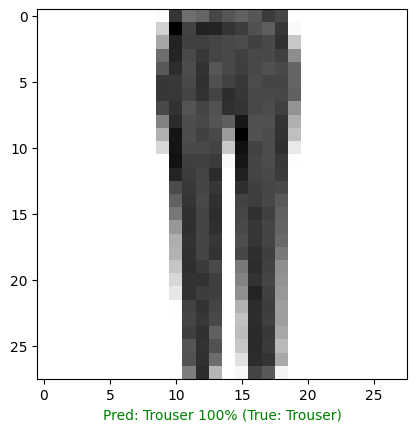

In [96]:
plot_random_image(model=model_5, images=test_images_norm, true_labels=test_labels, classes=class_names)

In [ ]:
# What patterns is our model is learning 

In [97]:
# Find the layers of our most recent model 

model_5.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [98]:
# Extract a particular layer 

model_5.layers[1]

<Dense name=dense_12, built=True>

In [101]:
# Get the patterns of a layer in our network 

weights, biases = model_5.layers[1].get_weights()

weights, weights.shape

(array([[ 0.4120536 , -0.12194648,  0.20689633, ..., -0.04380862,
         -0.09404642,  0.24609019],
        [ 0.12033546, -0.2729407 , -0.2817287 , ...,  0.06144666,
          0.12973535,  0.16483152],
        [ 0.14192215,  0.02687905,  0.16367662, ..., -0.04998723,
         -0.24999464, -0.17278557],
        ...,
        [-0.25210506, -0.03318623,  0.04025402, ..., -0.13086765,
         -0.10857807, -0.13565288],
        [-0.19689026, -0.08173179, -0.17920463, ..., -0.20566301,
          0.23454505,  0.14984563],
        [-0.06604619,  0.36397633,  0.03123249, ..., -0.24159758,
         -0.03825348, -0.20874847]], dtype=float32),
 (784, 50))

In [102]:
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,932 (495.83 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84,622 (330.56 KB)

In [106]:
weights[1]

array([ 0.12033546, -0.2729407 , -0.2817287 , -0.1399335 ,  0.1008111 ,
        0.14048587, -0.17146969, -0.25061664,  0.00311182, -0.14808722,
       -0.21592402,  0.0620924 ,  0.29258487,  0.2429524 ,  0.36947215,
        0.04467915, -0.0287366 ,  0.00638898,  0.6591916 ,  0.46786752,
       -0.08753422,  0.07866041, -0.2669317 , -0.18480712,  0.02166287,
       -0.18226607,  0.17893094,  0.00161692,  0.2253132 ,  0.04293442,
       -0.02272068,  0.08017857, -0.12853058,  0.02011775, -0.2571697 ,
       -0.05725354,  0.26918307, -0.12434942,  0.43624386,  0.0507019 ,
       -0.15762462, -0.25794488,  0.14115308, -0.06997871,  0.38923505,
       -0.07923272, -0.133992  ,  0.06144666,  0.12973535,  0.16483152],
      dtype=float32)

In [107]:
biases, biases.shape

(array([ 0.10799414, -0.05419768,  0.06157648, -0.14578652,  0.15254785,
        -0.2362571 , -0.041092  ,  0.07752549, -0.06954645,  0.09759879,
         0.28562203,  0.1443157 ,  0.10093836,  0.10794231,  0.05874078,
        -0.00305779, -0.00572791,  0.00038022,  0.15996973,  0.14790434,
        -0.08089772, -0.14662941,  0.00318312, -0.10103469, -0.00848843,
         0.17297423,  0.15673648,  0.10619505,  0.18545616, -0.0114142 ,
         0.15332457, -0.01223526,  0.11724121, -0.07968839,  0.2558028 ,
        -0.01307984, -0.17204824, -0.11806513,  0.18639241, -0.0880004 ,
         0.00569686,  0.298326  , -0.12402208,  0.22117957,  0.18052478,
         0.13324566, -0.26910418, -0.05559653, -0.05317662, -0.18207459],
       dtype=float32),
 (50,))

In [111]:
from keras.utils import plot_model

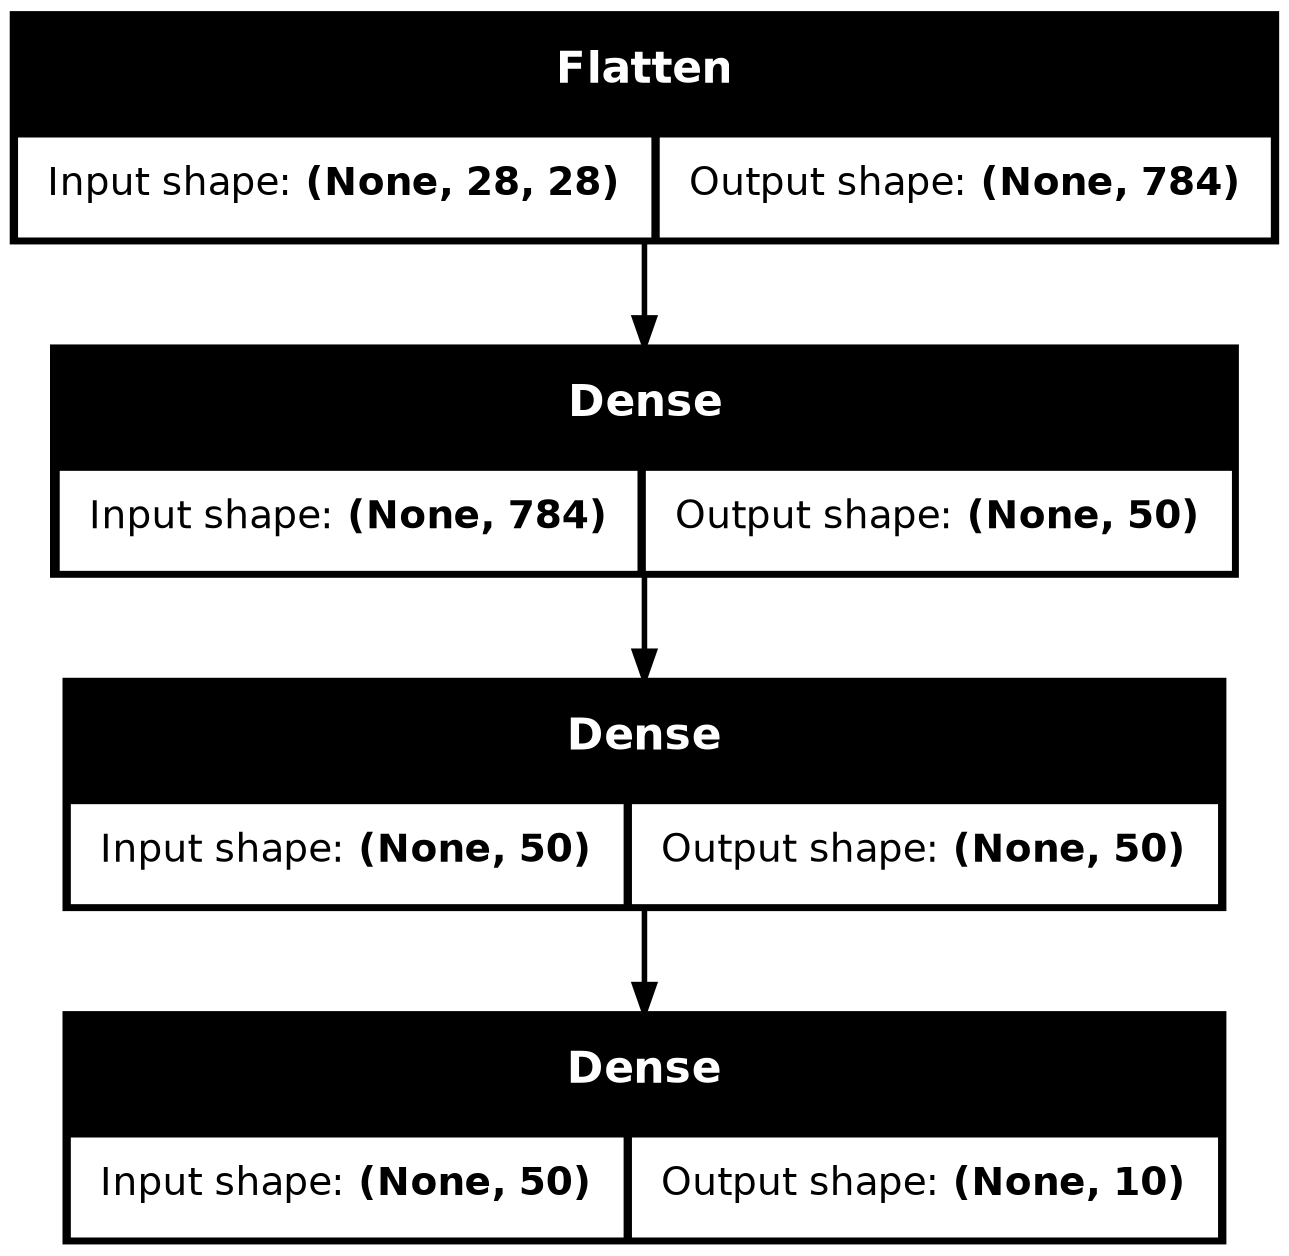

In [112]:
plot_model(model_5, show_shapes=True)